<a href="https://colab.research.google.com/github/Subin-pds/Supervised_ML_Projects/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Loading the csv file
df = pd.read_csv('income.csv')

In [10]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

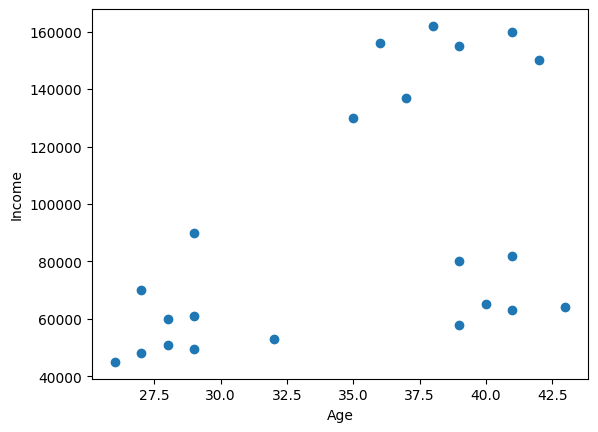

In [13]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

In [15]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

How to select best n_clusters. This is done using a method called Silhoute Method where a score [-1,1] is used to identify the closeness of the clusters with each other. The number close to +1 indicates that the cluster is far away from the other cluster. The score near to 0 indicates the cluster is closer to the other cluster. If the score is near to -1 it indicates that the data point is wronly mapped to a cluster.

Link: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [21]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
df['prediction'] = y_predicted
df

,Name,Age,Income($),prediction
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [22]:
df1 = df[df.prediction==0]
df2 = df[df.prediction==1]
df3 = df[df.prediction==2]

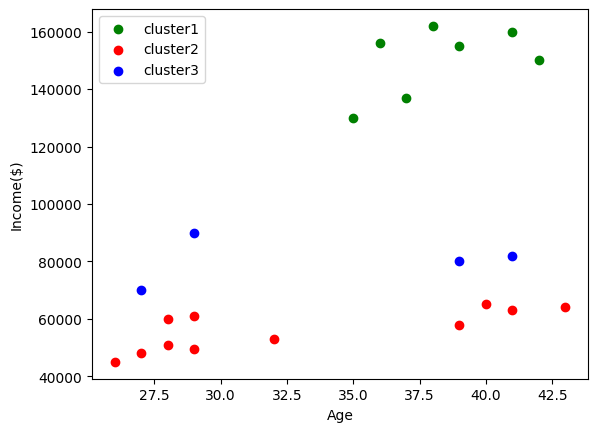

In [27]:
plt.scatter(df1.Age, df1['Income($)'], color='green', label='cluster1')
plt.scatter(df2.Age, df2['Income($)'], color='red', label='cluster2')
plt.scatter(df3.Age, df3['Income($)'], color='blue',label='cluster3')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()

In [30]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),prediction
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0
5,Gautam,39,0.940171,0
6,David,41,0.982906,0
7,Andrea,38,1.000000,0
8,Brad,36,0.948718,0
9,Angelina,35,0.726496,0


In [31]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),prediction
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


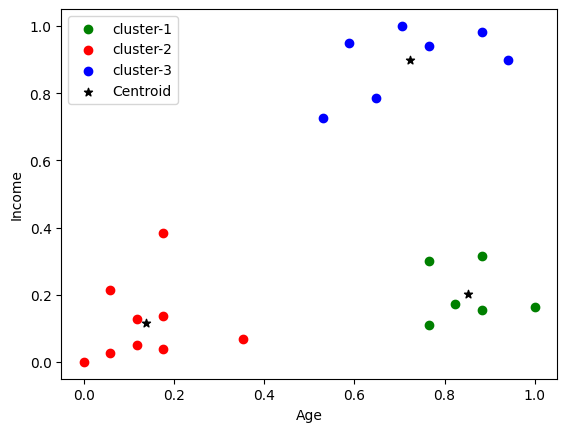

In [34]:
predicted = km.fit_predict(df[['Age', 'Income($)']])
df['prediction'] = predicted

df1 = df[df['prediction']==0]
df2 = df[df['prediction']==1]
df3 = df[df['prediction']==2]

plt.scatter(df1['Age'], df1['Income($)'], color ='green', label= 'cluster-1')
plt.scatter(df2['Age'], df2['Income($)'], color ='red', label = 'cluster-2')
plt.scatter(df3['Age'], df3['Income($)'], color ='blue', label = 'cluster-3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker = '*', color = 'Black', label='Centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()
